In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup


I would like to see the correlation between NFL wide receiver rankings for fantasty football (average draft position, ADP) and their yardage rank from the previous year. While yardage rank shouldn't be the only metric used to predict a WR's position for next year, it is definitely one that needs to be taken into account. 

Is it the biggest factor? 

In [44]:
### Read in the url from fantasyfootballers.org containing
### the yardage leaders for 2019-2020.

url = "https://fantasyfootballers.org/wr-wide-receiver-nfl-stats/"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')

In [45]:
### Extract the table containing names and stats ("tbody").
### Extract the cell containing the athlete's name ("tr td a")
### Though grabbing the name could be done in one step, I'd like to keep
### the entire table in case I'd like to pull other data. 

t_body = soup.find("tbody")
leaders_2019 = t_body.select("tr td a")

name_list = []
for a in leaders_2019:
    name_list.append(a.get_text())

name_list[0:6]

### We find that the 'a' tags grabs both the name and the team.

['Michael Thomas', 'NO', 'Chris Godwin', 'TB', 'Julio Jones', 'ATL']

In [47]:
### Graphing with the team name could get tricky, so I remove the team name.

yard_leaders = name_list.copy()
yard_leaders = yard_leaders[0::2]
yard_leaders[0:15]

### https://stackoverflow.com/questions/17777482/
### how-to-remove-every-other-element-of-an-array-in-python-the-
### inverse-of-np-repe

['Michael Thomas',
 'Chris Godwin',
 'Julio Jones',
 'Mike Evans',
 'Davante Adams',
 'Michael Gallup',
 'DJ Moore',
 'DeAndre Hopkins',
 'Robert Woods',
 'Stefon Diggs',
 'Devante Parker',
 'Keenan Allen',
 'Kenny Golladay',
 'Amari Cooper',
 'Jarvis Landry']

In [48]:
### Next I'll import the latest (April 20th, 2020) ADP for 2020 WRs, and 
### clean the data.

adp_2020 = pd.read_csv("FantasyPros_2020_Draft_WR_Rankings.csv")
adp_2020_wr = adp_2020["Wide Receivers"]
adp_2020_wr.head(15)

0          Michael Thomas
1           Davante Adams
2             Tyreek Hill
3         DeAndre Hopkins
4             Julio Jones
5            Chris Godwin
6              Mike Evans
7            Amari Cooper
8          Kenny Golladay
9       Odell Beckham Jr.
10         Allen Robinson
11             D.J. Moore
12       Courtland Sutton
13    JuJu Smith-Schuster
14             A.J. Brown
Name: Wide Receivers, dtype: object

In [49]:
### I'm surprised to see only 9 of last years yardage leaders are in the 
### top 15 of this years ADP for WRs. What's even more interesting is where
### some of these players are in relation to each other. In particular,
### Julio Jones, Davante Adams, Chris Godwin DeAndre Hopkins, and 
### Amari Cooper. 

### I'll create a new dataframes to add a rank column for each player, then 
### merge to have a single dataframe for graphing. 

In [169]:
adp_ranks = adp_2020_wr.copy()
adp_ranks = adp_ranks.to_frame()
yard_ranks = yard_leaders.copy()
yard_ranks = pd.DataFrame(yard_ranks, columns = ['Wide Receivers'])

adp_ranks['adp rank'] = np.arange(len(adp_ranks))
yard_ranks['yard rank'] = np.arange(len(yard_ranks))
yard_ranks

,Wide Receivers,yard rank
0,Michael Thomas,0
1,Chris Godwin,1
2,Julio Jones,2
3,Mike Evans,3
4,Davante Adams,4
...,...,...
203,Mike Thomas,203
204,Krishawn Hogan,204
205,De'Anthony Thomas,205
206,Darrius Shepherd,206


In [93]:
adp_ranks

,Wide Receivers,adp rank
0,Michael Thomas,0
1,Davante Adams,1
2,Tyreek Hill,2
3,DeAndre Hopkins,3
4,Julio Jones,4
...,...,...
149,Chris Hogan,149
150,Keelan Doss,150
151,Alex Erickson,151
152,NaN,152


In [96]:
### Adding new row to match rank number with index

new_row = pd.DataFrame({'Wide Receivers':'blank','adp rank':'0'}, index=[0])
test_pd = adp_ranks.copy()
test_pd = pd.concat([new_row, test_pd[:]]).reset_index(drop=True)
test_pd['adp rank'] = np.arange(len(test_pd))
test_pd.head()

### https://www.geeksforgeeks.org/add-a-row-at-top-in-pandas-dataframe/

,Wide Receivers,adp rank
0,blank,0
1,Michael Thomas,1
2,Davante Adams,2
3,Tyreek Hill,3
4,DeAndre Hopkins,4


In [100]:
### Adding new row to match rank number with index

new_yard_row = pd.DataFrame({'Wide Receivers':'blank','yard rank':'0'}, index=[0])
new_yard_ranks = yard_ranks.copy()
new_yard_ranks = pd.concat([new_yard_row, new_yard_ranks[:]]).reset_index(drop=True)
new_yard_ranks['yard rank'] = np.arange(len(new_yard_ranks))
new_yard_ranks.head()

,Wide Receivers,yard rank
0,blank,0
1,Michael Thomas,1
2,Chris Godwin,2
3,Julio Jones,3
4,Mike Evans,4


In [102]:
### Merge the two dataframes on the players to compare their adp rank
### and their 2019 yardage rank

adp_yards_pd = test_pd.merge(new_yard_ranks, on='Wide Receivers')
adp_yards_pd

,Wide Receivers,adp rank,yard rank
0,blank,0,0
1,Michael Thomas,1,1
2,Davante Adams,2,5
3,Tyreek Hill,3,18
4,DeAndre Hopkins,4,8
...,...,...,...
107,Jakeem Grant,146,128
108,Malik Turner,147,122
109,Chris Hogan,150,158
110,Keelan Doss,151,102


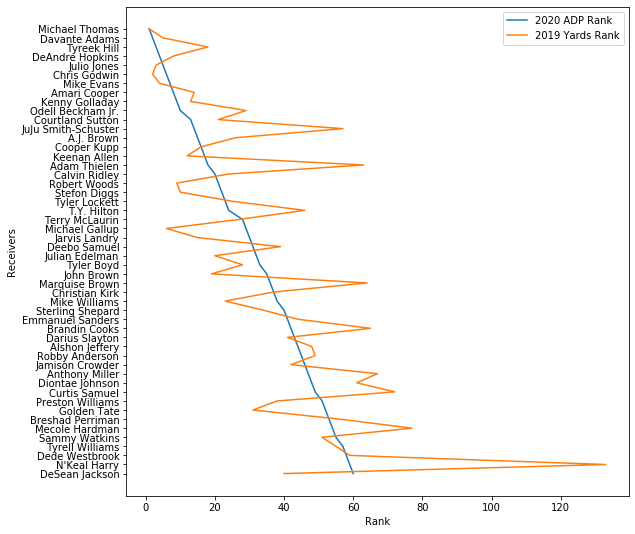

In [164]:
plt.figure(figsize=(9,9))
top_50 = adp_yards_pd[0:51].drop([0]).sort_values(by="adp rank", ascending=False)
x1 = top_50["adp rank"]
y1 =  top_50["Wide Receivers"]
x2 = top_50["yard rank"]
plt.plot(x1,y1, label='2020 ADP Rank')
plt.plot(x2,y1, label='2019 Yards Rank')
plt.ylabel("Receivers")
plt.xlabel("Rank")
plt.legend()

### We can see a lot of variance between ADP and yardage ranks. 

<Figure size 720x720 with 0 Axes>

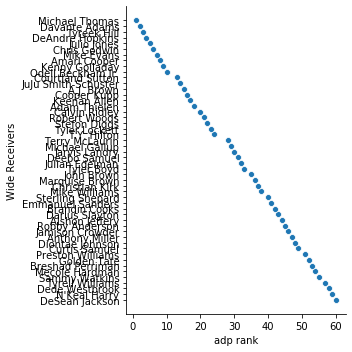

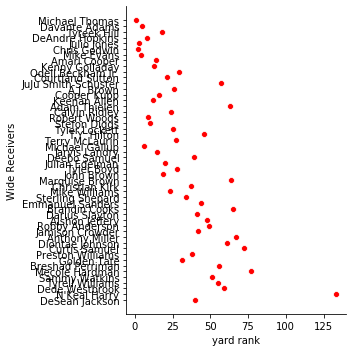

In [161]:
plt.figure(figsize=(10,10))
#top_50 = adp_yards_pd[0:51].drop([0]).sort_values(by="adp rank", ascending=False)
sns.relplot(x="adp rank", y="Wide Receivers", data=top_50)
sns.relplot(x="yard rank", y="Wide Receivers", color="red",data=top_50 )